<a href="https://colab.research.google.com/github/candacestern/password-gen/blob/master/COSC_611_Stern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Type and Quality

https://www.kaggle.com/datasets/piyushagni5/white-wine-quality?resource=download - access to the white wine dataset
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 - access to the red wine dataset

In [ ]:
!pip install tensorflow
!pip install scikeras

In [ ]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from matplotlib.ticker import PercentFormatter
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree

# New Section

In [ ]:
# LOADING AND REVIEWING DATA SETS
white_wine = pd.read_csv("winequality-white.csv", sep=';')
red_wine = pd.read_csv("winequality-red.csv", sep=',')
print(white_wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

Adding the 'Type' column to be able to identify between red and white wines once we combine the datasets.

In [ ]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'

wine_data=pd.concat([red_wine, white_wine], ignore_index=True)
print(wine_data.head(5))
print(wine_data.tail(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Column Definitions

1) Fixed acidity: acids are major wine properties and contribute to the wine’s taste. The total acidity is divided into two groups: volatile acids and nonvolatile/fixed acids. Fixed acids you can find in wines are: tartaric, malic, citric, and succinic.

2) Volatile acidity: the volatile acidity is the process of wine turning into vinegar. The legal limits of Volatile Acidity are 1.2 g/L for red wine and 1.1 g/L for white wine.

3) Citric acid is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3dm3 in the two data sets.

4) Residual sugar typically refers to the sugar remaining after fermentation stops, or is stopped. It’s expressed in g/dm3dm3 in the red and white data.

5) Chlorides can be a major contributor to saltiness in wine.

6) Free sulfur dioxide: the part of the sulphur dioxide that is added to a wine and that is lost into it is said to be bound, while the active part is said to be free. Winemakers will always try to get the highest proportion of free sulphur to bind. This variables is expressed in mg/dm3dm3 in the data.

7) Total sulfur dioxide is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3dm3. Thhe legal limits are set at 350mg/L.

8) Density is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g/cm3cm3.

9) pH or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

10) Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered necessary. In this case, they are expressed in g(potassiumsulphate)/dm3dm3.

11) Alcohol: the percentage of alcohol can vary from wine to wine. This is expressed in % vol.

12) Quality: wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual number is the median of at least three evaluations made by those same wine experts.

13) Type: the type of wine

In [ ]:
# Obtain a statistical summary
statistical_summary = wine_data.describe()
print(statistical_summary)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

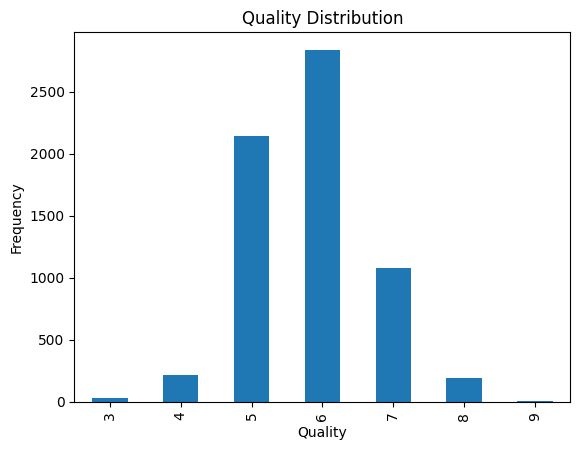

In [ ]:
# Analyze the distribution of the quality ratings
wine_data['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

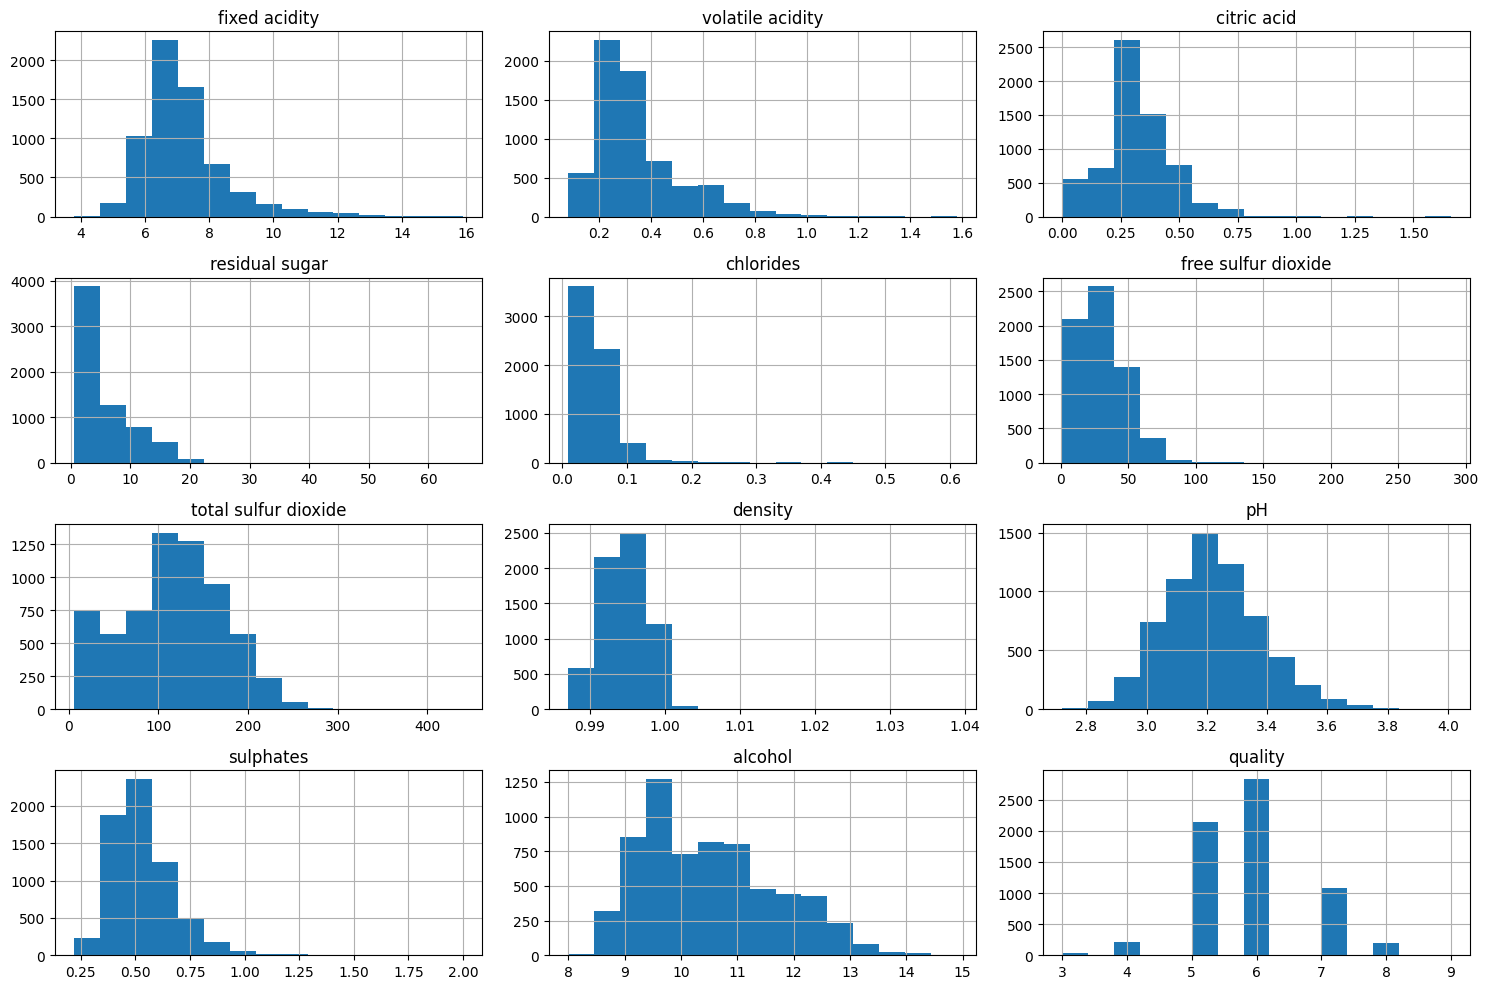

In [ ]:
# Histograms for variable distributions
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

<ipython-input-8-4112e701d91e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wine_data.corr()


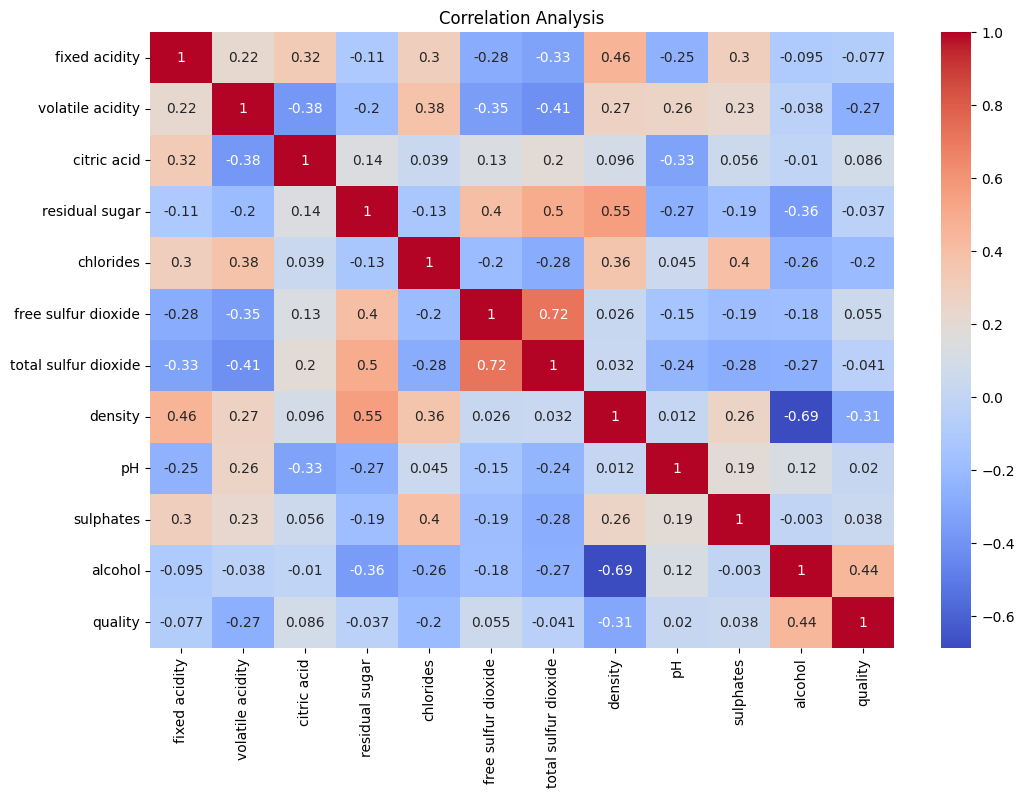

In [ ]:
# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

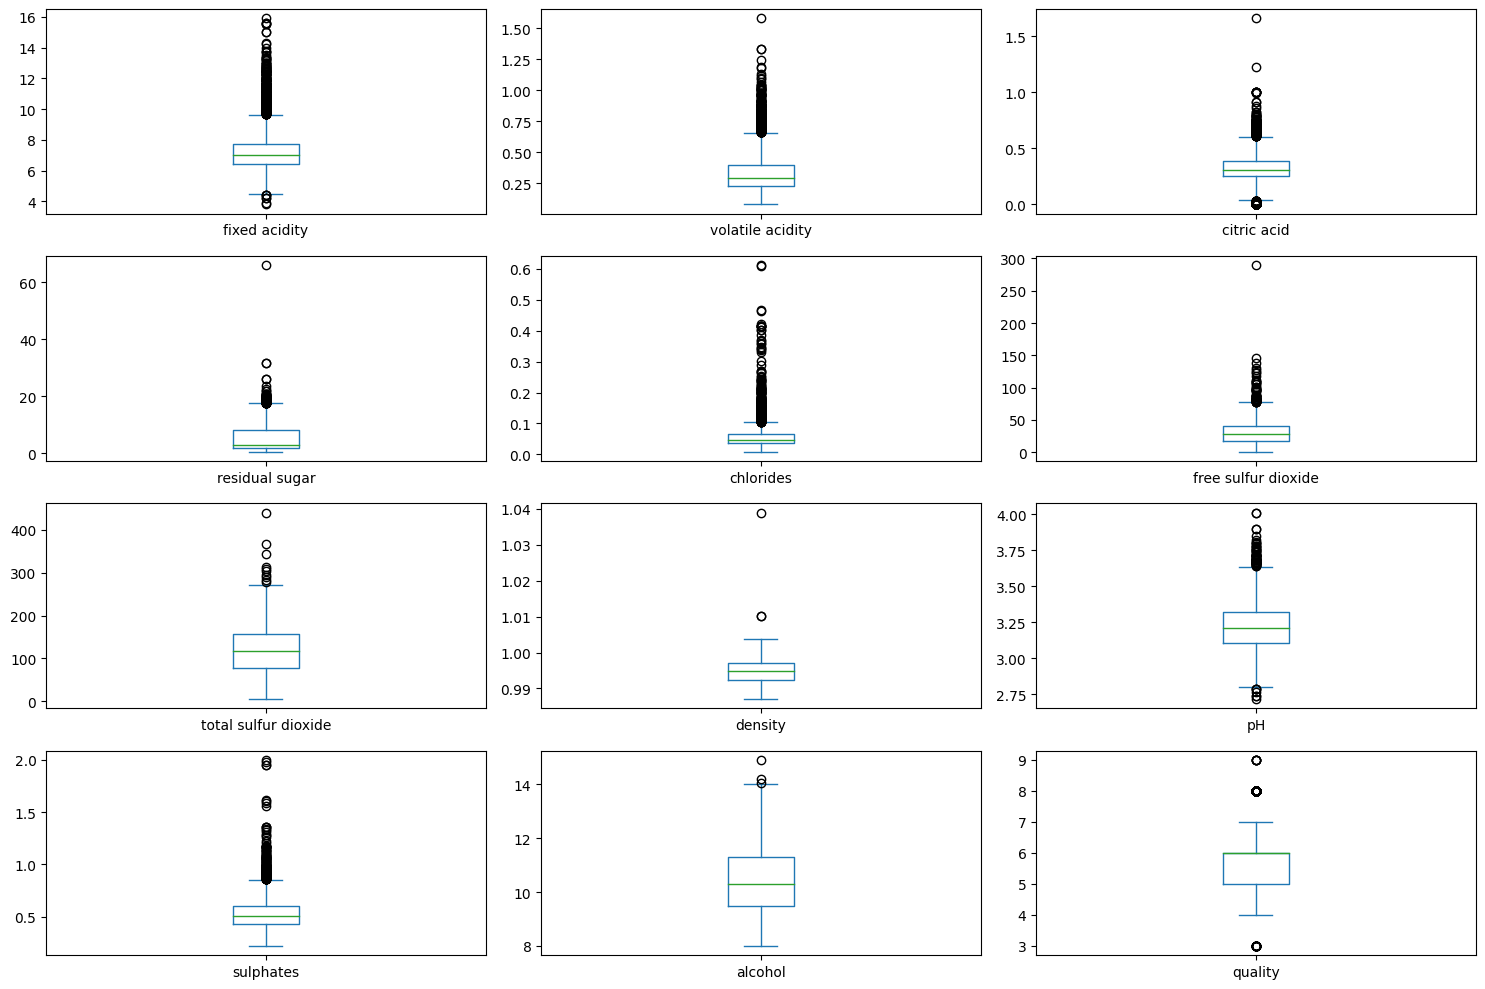

In [ ]:
# Boxplots for outlier detection
wine_data.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 10))
plt.tight_layout()
plt.show()

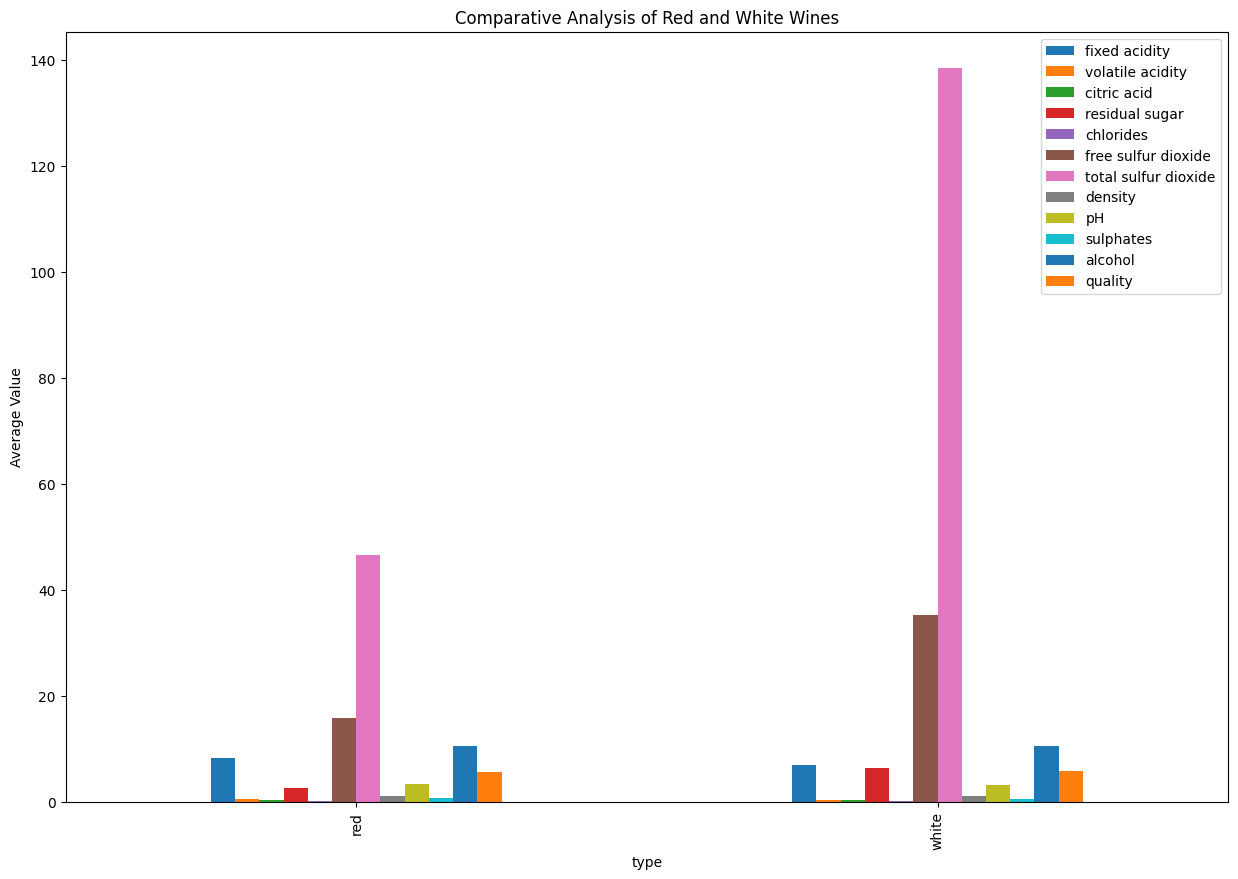

In [ ]:
# Compare mean values of chemical properties for red and white wines
grouped_data = wine_data.groupby('type').mean()
grouped_data.plot(kind='bar', figsize=(15, 10))
plt.title('Comparative Analysis of Red and White Wines')
plt.ylabel('Average Value')
plt.show()

In [ ]:
missing_values = wine_data.isnull().sum()

# If there are any missing values, you can fill them with the mean
wine_data.fillna(wine_data.mean(), inplace=True)

<ipython-input-11-d46ff90c7808>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_data.fillna(wine_data.mean(), inplace=True)


In [ ]:
# encoding type because it is a categorical varaible for the type of wine
wine_data = pd.get_dummies(wine_data, columns=['type'], drop_first=True)

Add how i determined my skewed distributions

In [ ]:
skewed_features = ['residual sugar', 'chlorides', 'free sulfur dioxide']
wine_data[skewed_features] = np.log1p(wine_data[skewed_features])

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

#seperating features and dropping the target variable 'quality'.

features = wine_data.drop('quality', axis=1)
scaler = StandardScaler()

# Fit the scaler to the features and transform
features_scaled = scaler.fit_transform(features)

# Updated wine_data with the scaled features
wine_data.update(pd.DataFrame(features_scaled, columns=features.columns))


In [ ]:
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)
wine_data_outliers = wine_data[outliers]

# Removing
wine_data_no_outliers = wine_data[~outliers]

Reassessing

In [ ]:
# Obtain a statistical summary
statistical_summary = wine_data.describe()
print(statistical_summary)

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean   -3.849639e-16      1.049902e-16  2.187295e-17    3.499672e-17   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.634589e+00     -1.577330e+00 -2.192833e+00   -1.687053e+00   
25%    -6.289329e-01     -6.661613e-01 -4.723335e-01   -8.666191e-01   
50%    -1.660892e-01     -3.016939e-01 -5.941375e-02   -3.437099e-01   
75%     3.738951e-01      3.664962e-01  4.911459e-01    8.613675e-01   
max     6.699425e+00      7.534354e+00  9.231281e+00    3.783867e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean  -3.499672e-17         4.899540e-16         -6.999344e-17 -3.552167e-15   
std    1.000077e+00         1.000077e+00          1.000077e+00  1.000077e+00   
min   -1.463780e+00        -3.9

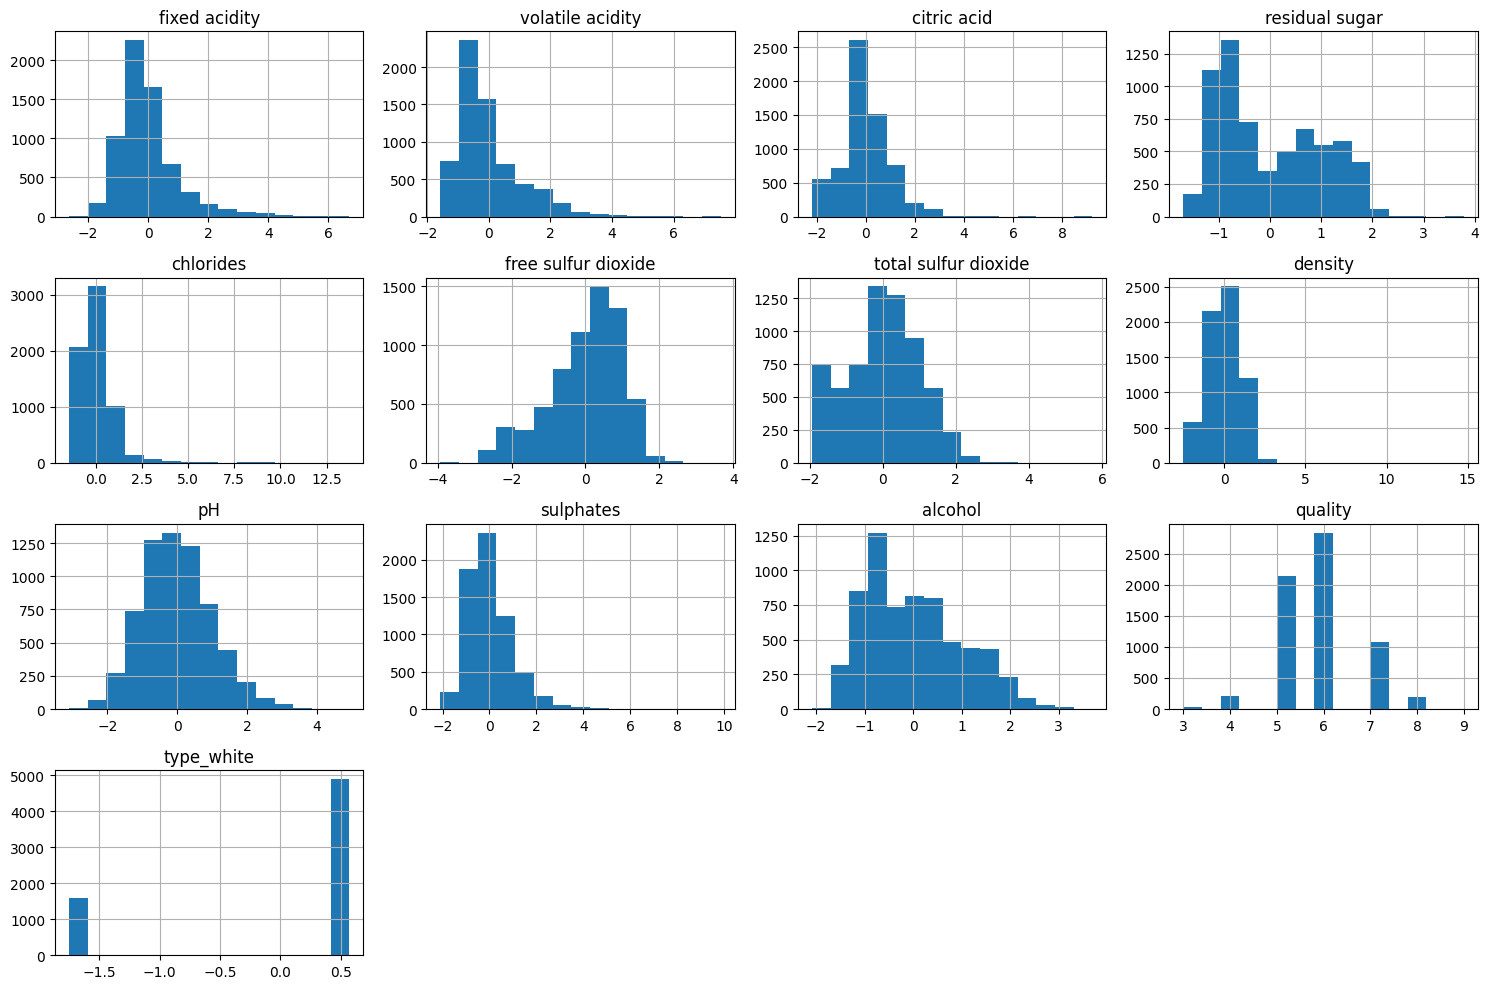

In [ ]:
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

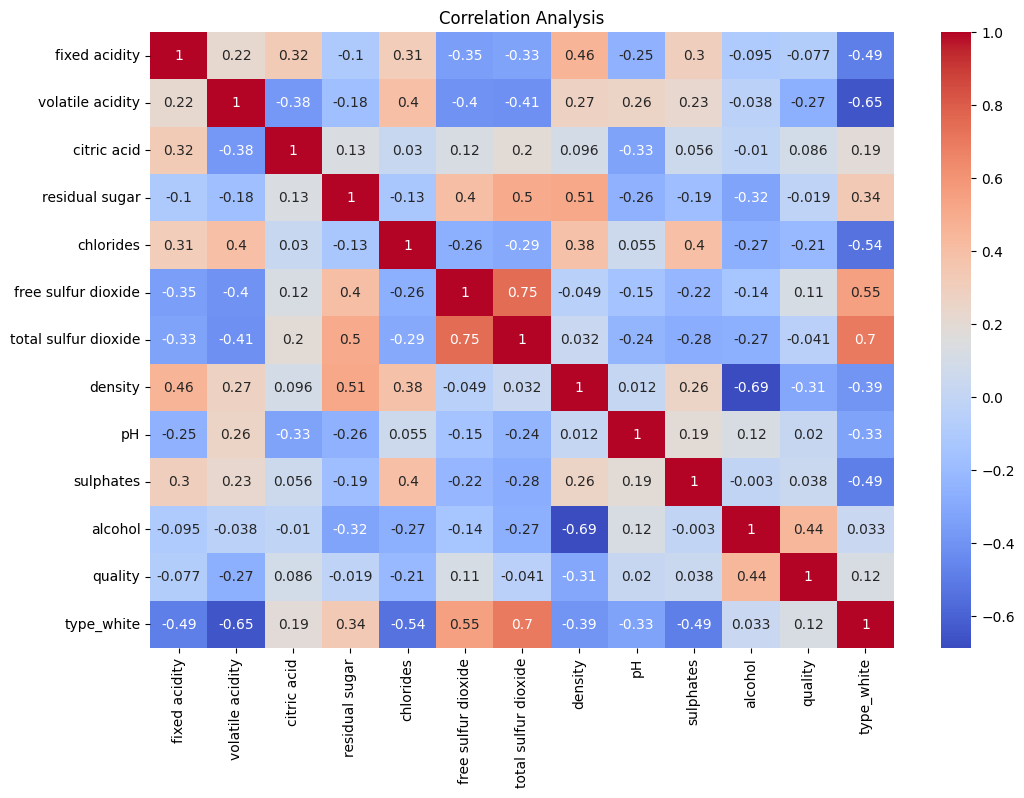

In [ ]:
# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

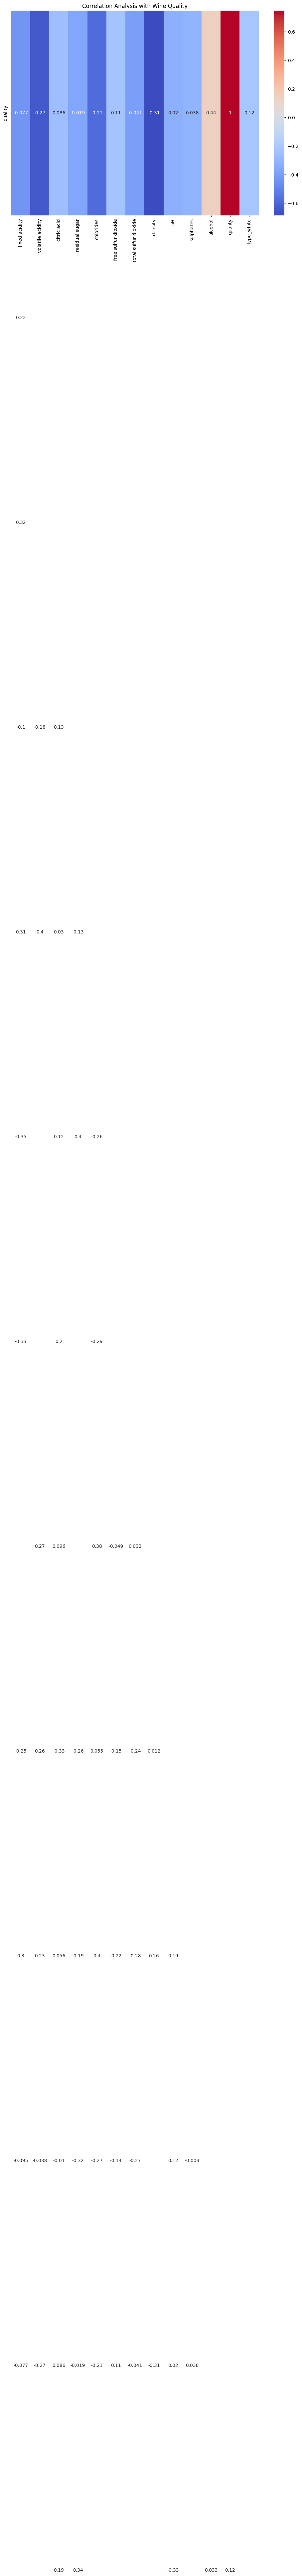

In [ ]:
correlation_matrix = wine_data.corr()

# Create a mask to display only one half of the matrix (as it's mirrored across the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)

# Emphasizing the 'quality' row/column specifically
quality_correlation = correlation_matrix.loc[:, ['quality']].transpose()
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', cbar=False)

plt.title('Correlation Analysis with Wine Quality')
plt.show()

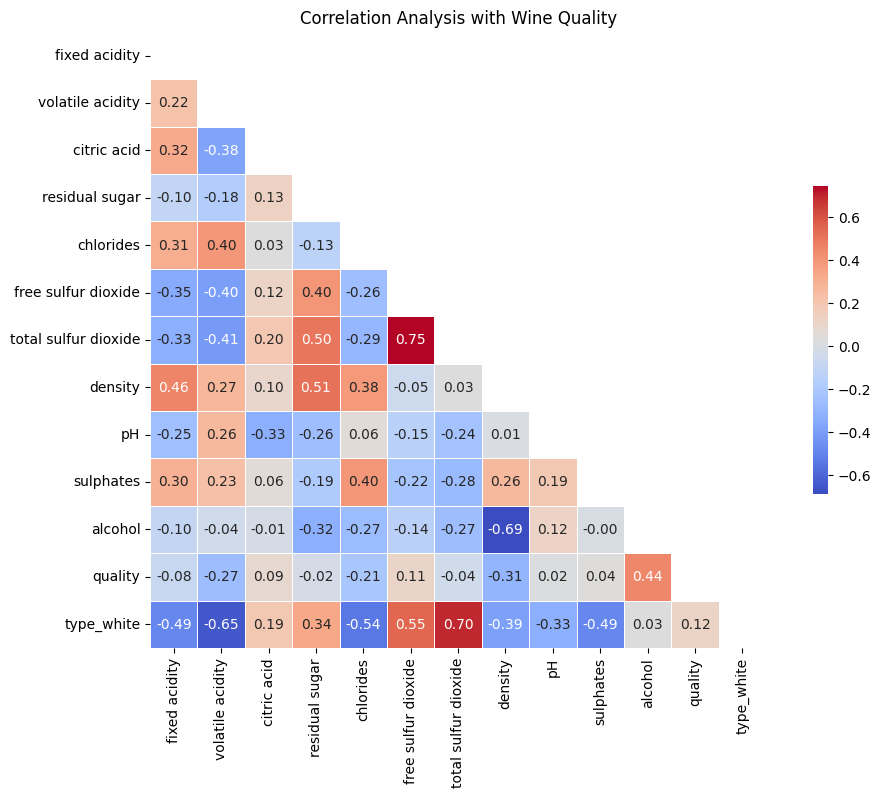

In [ ]:
correlation_matrix = wine_data.corr()

plt.figure(figsize=(12, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Analysis with Wine Quality')
plt.show()

In [ ]:
pd.isnull(wine_data).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

# **OLD FINDINGS**



<Axes: xlabel='quality', ylabel='density'>

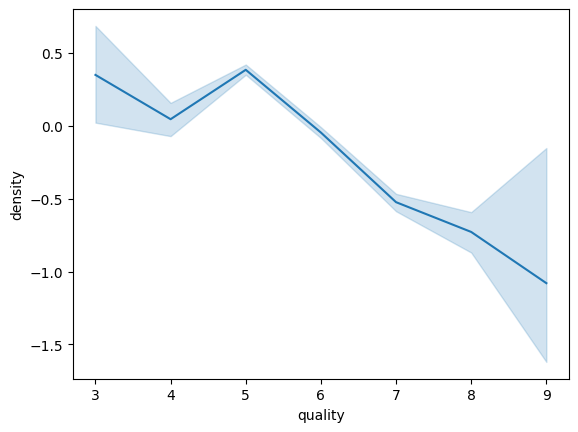

In [ ]:
#Quality vs Density

sns.lineplot(x='quality',y='density',data=wine_data)

Wine is considered to be good quality if the density is less.

In [ ]:
#SPECIFYING TARGET AND SPLITTING DATA
# Selecting primary and secondary predictors
feature_columns = ['alcohol', 'volatile acidity', 'chlorides', 'density', 'citric acid', 'free sulfur dioxide']
X = wine_data[feature_columns]

# Target variable
y = wine_data['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 0.4185984608619174


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Gradient Boosting MSE: {mse_gbr}")

Gradient Boosting MSE: 0.47863822582929855


In [ ]:
# Initialize the model
nn_model = Sequential()
nn_model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions and evaluate
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network MSE: {mse_nn}")

Epoch 1/10
132/132 [==============================] - 1s 2ms/step - loss: 33.2071
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 22.5265
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 14.1893
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 8.1758
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 4.5937
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 2.9459
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 2.3472
Epoch 8/10
132/132 [==============================] - 0s 2ms/step - loss: 2.1026
Epoch 9/10
132/132 [==============================] - 0s 2ms/step - loss: 1.9274
Epoch 10/10
72/72 [==============================] - 0s 2ms/step
Neural Network MSE: 1.6828431552549639


In [ ]:
# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                           n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Calculate the MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Refined Random Forest MSE: {mse_rf}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Refined Random Forest MSE: 0.3972657771394849


In [ ]:
# Initialize Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid,
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search_gbr.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search_gbr.best_params_)

# Best model
best_gbr_model = grid_search_gbr.best_estimator_

# Predictions and evaluation
y_pred_gbr = best_gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Refined Gradient Boosting MSE: {mse_gbr}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Refined Gradient Boosting MSE: 0.45016908886908114


In [ ]:
# Initialize the model
nn_model = Sequential()

# Add layers (example: one hidden layer with more neurons)
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression

# Compile the model with a different optimizer and/or learning rate
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with adjusted epochs and/or batch size
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Refined Neural Network MSE: {mse_nn}")

Epoch 1/20
106/106 [==============================] - 1s 5ms/step - loss: 11.4730 - val_loss: 2.7752
Epoch 2/20
106/106 [==============================] - 0s 3ms/step - loss: 2.0337 - val_loss: 1.9836
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 1.4960 - val_loss: 1.5333
Epoch 4/20
106/106 [==============================] - 0s 3ms/step - loss: 1.1135 - val_loss: 1.1133
Epoch 5/20
106/106 [==============================] - 0s 4ms/step - loss: 0.8595 - val_loss: 0.8882
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 0.7093 - val_loss: 0.7170
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6322 - val_loss: 0.5927
Epoch 8/20
106/106 [==============================] - 0s 3ms/step - loss: 0.6054 - val_loss: 0.5425
Epoch 9/20
106/106 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5176
Epoch 10/20
106/106 [==============================] - 0s 3ms/step - loss: 0.5642 - val_loss: 0.503

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with the best parameters found
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE
mse_scores = -cv_scores

# Calculate the average and standard deviation of the MSE scores
print("Average MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))

Average MSE: 0.5555709486919939
Standard Deviation of MSE: 0.0561272479408983
